In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [11]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import chardet

with open('6.x_commit_log.csv', 'rb') as file:
    result = chardet.detect(file.read())
    print(result)  # 会返回 {'encoding': '编码类型'}

{'encoding': 'MacRoman', 'confidence': 0.7275634316831319, 'language': ''}


In [34]:
# 设置图形的默认样式
sns.set(style="whitegrid")

df = pd.read_csv('6.x_commit_log.csv', encoding='ISO-8859-1')

C:\Users\user\AppData\Local\Temp\ipykernel_14324\4047151538.py:4: DtypeWarning: Columns (9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('6.x_commit_log.csv', encoding='ISO-8859-1')


In [36]:
# 显示数据的前几行，检查数据结构
df.head()

,commit_hash,author,commit_date,commit_summary,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,aea156e46c,Tim Abbott,2023/5/31,"530d1057bb\,i18n: Update translation data from...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,530d1057bb,Anders Kaseorg,2023/5/24,"633a2931f5\,requirements: Downgrade orjson to ...",Signed-off-by: Anders Kaseorg <anders@zulip.co...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,633a2931f5,Alex Vandiver,2023/5/19,"c2a658bcd0\,version: Update version after 6.2 ...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,c2a658bcd0,Alex Vandiver,2023/5/19,"5082182e37\,test_signup: Test for warning outp...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5082182e37,Alex Vandiver,2023/5/19,"7c2693a2c6\,Release Zulip Server 6.2.""",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df.columns = df.columns.str.strip()
# 将提交日期列转换为 datetime 类型
df['commit_date'] = pd.to_datetime(df['commit_date'], errors='coerce')

# 检查是否有缺失值
df.isnull().sum()

# 删除含有缺失提交日期的行（如果有的话）
df = df.dropna(subset=['commit_date'])


In [44]:
# 强制将 commit_date 转换为 datetime 类型，并处理无效日期（将无效日期设置为 NaT）
df['commit_date'] = pd.to_datetime(df['commit_date'], errors='coerce')

# 检查是否有空值或无效日期，去除这些行
df = df.dropna(subset=['commit_date'])

# 将 commit_date 列转换为 "Period" 类型的月
df['month'] = df['commit_date'].dt.to_period('M')
# 确保使用 .loc 进行修改
df.loc[:, 'commit_date'] = pd.to_datetime(df['commit_date'], errors='coerce')

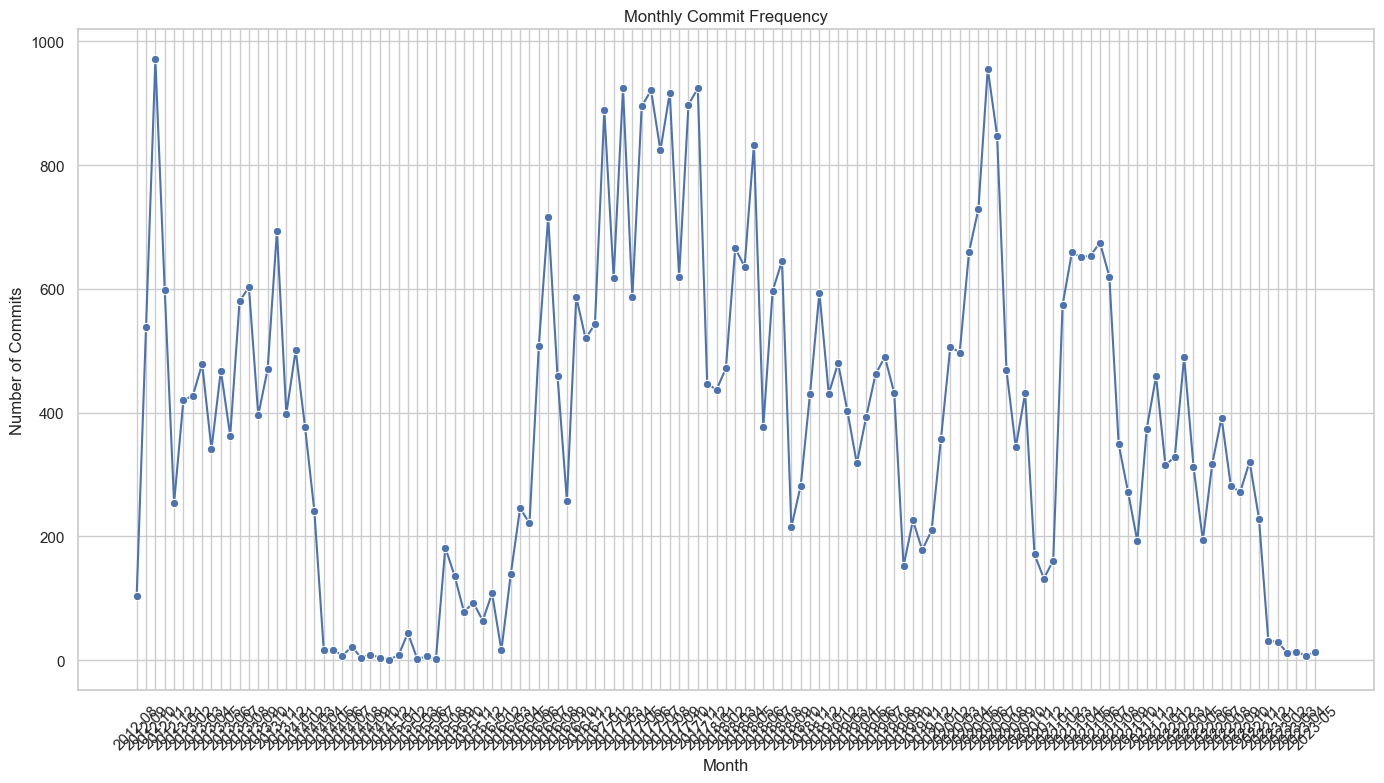

In [45]:
# 转换 'month' 列为字符串类型
df['month_str'] = df['month'].astype(str)

# 按月统计提交次数
monthly_commits = df.groupby('month_str').size().reset_index(name='commit_count')

# 绘制每月提交数量的趋势图
plt.figure(figsize=(14, 8))
sns.lineplot(x='month_str', y='commit_count', data=monthly_commits, marker='o', color='b')
plt.title('Monthly Commit Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Commits')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14324\3061945520.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='commit_count', y='author', data=author_commit_count.head(20), palette='viridis')


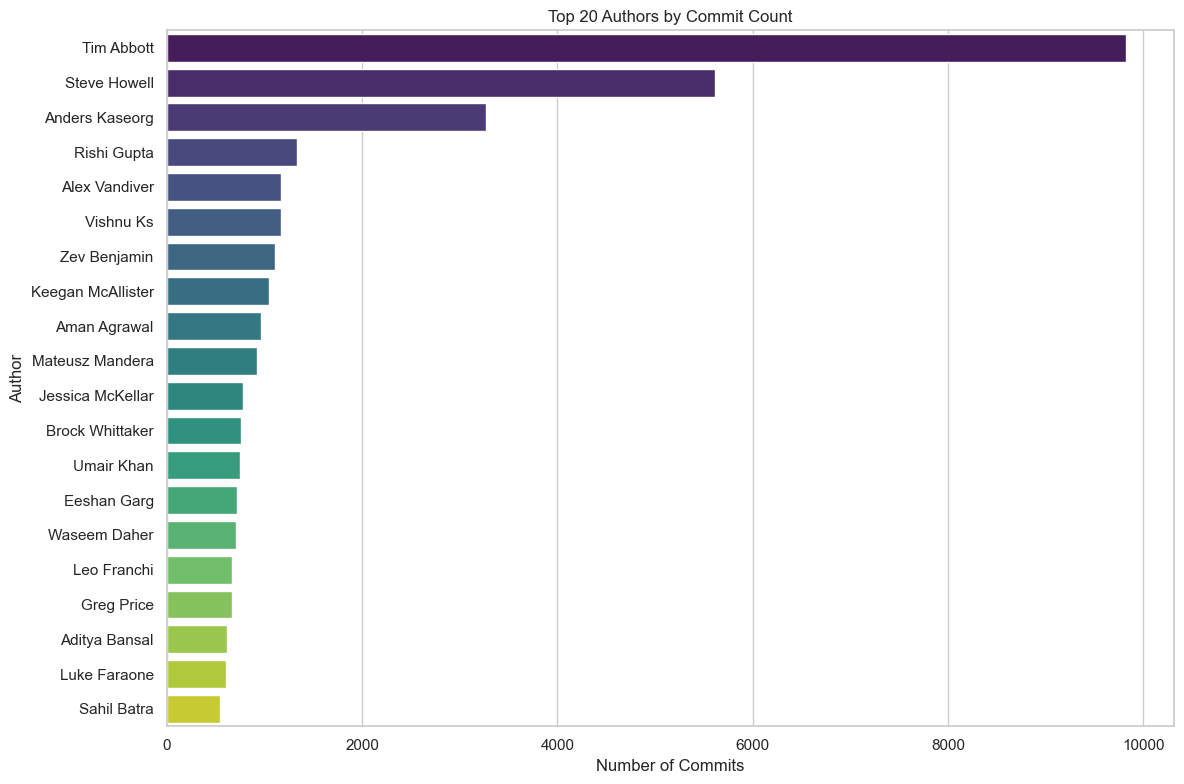

In [46]:
# 按提交者统计提交次数
author_commit_count = df['author'].value_counts().reset_index()
author_commit_count.columns = ['author', 'commit_count']

# 绘制提交者的提交数量柱状图（显示前20名）
plt.figure(figsize=(12, 8))
sns.barplot(x='commit_count', y='author', data=author_commit_count.head(20), palette='viridis')
plt.title('Top 20 Authors by Commit Count')
plt.xlabel('Number of Commits')
plt.ylabel('Author')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14324\2215306937.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='commit_count', y='author', data=author_avg_commits.head(20), palette='plasma')


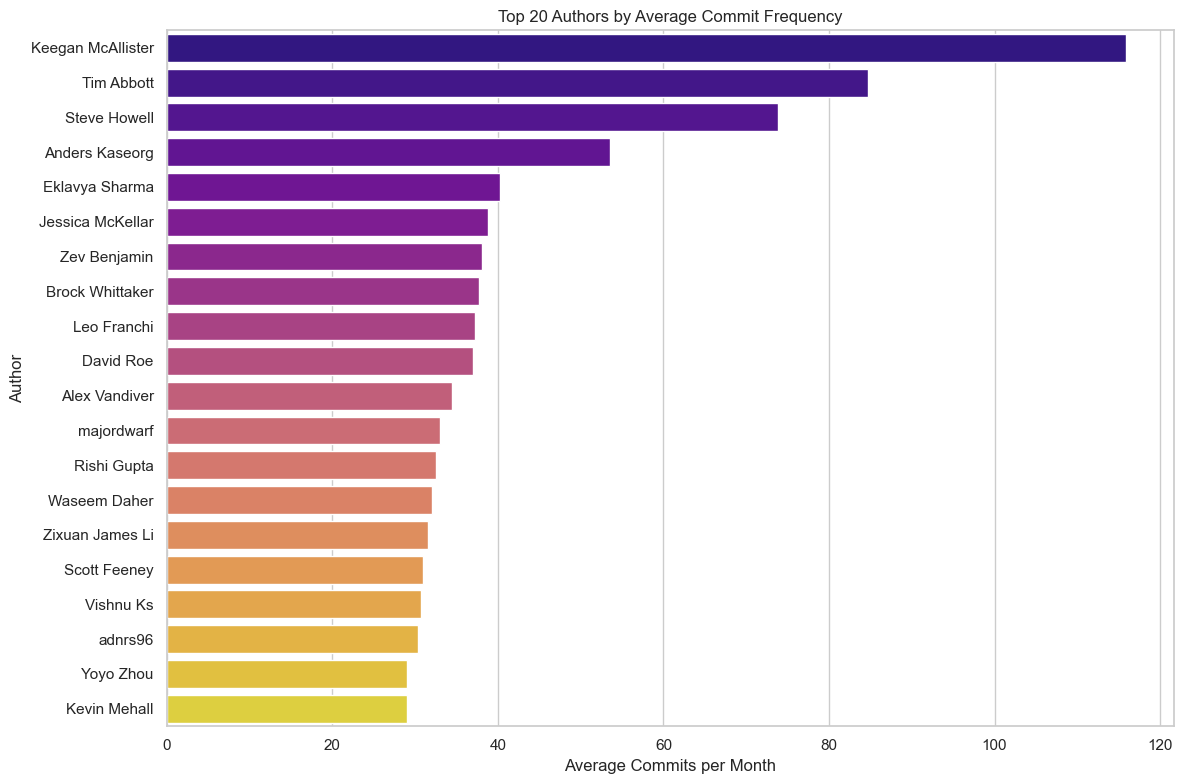

In [47]:
# 计算每位提交者的月度提交数量
df['month'] = df['commit_date'].dt.to_period('M')
author_monthly_commits = df.groupby(['author', 'month']).size().reset_index(name='commit_count')

# 计算每位提交者的平均提交频率
author_avg_commits = author_monthly_commits.groupby('author')['commit_count'].mean().reset_index().sort_values(by='commit_count', ascending=False)

# 绘制每位提交者的平均提交频率柱状图（显示前20名）
plt.figure(figsize=(12, 8))
sns.barplot(x='commit_count', y='author', data=author_avg_commits.head(20), palette='plasma')
plt.title('Top 20 Authors by Average Commit Frequency')
plt.xlabel('Average Commits per Month')
plt.ylabel('Author')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14324\1325465577.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='commit_count', data=weekday_commits, palette='Blues')


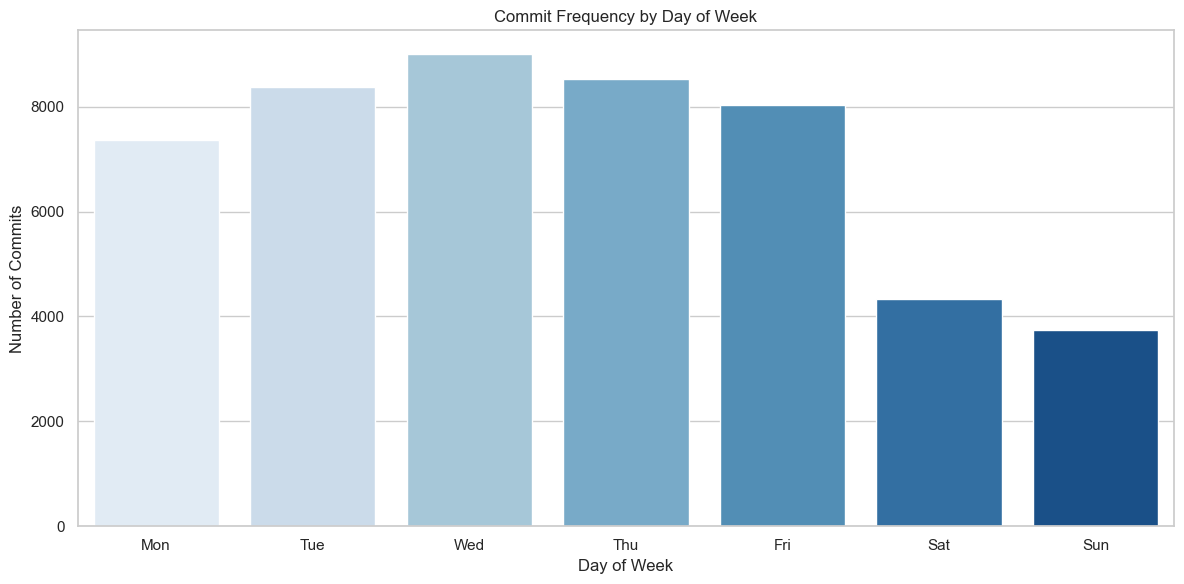

In [48]:
# 提取星期几
df['weekday'] = df['commit_date'].dt.dayofweek

# 按星期几统计提交数量
weekday_commits = df.groupby('weekday').size().reset_index(name='commit_count')

# 绘制按星期几提交数量的柱状图
plt.figure(figsize=(12, 6))
sns.barplot(x='weekday', y='commit_count', data=weekday_commits, palette='Blues')
plt.title('Commit Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Commits')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()

In [49]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.2 kB 217.9 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/301.2 kB 217.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.2 kB 196.9 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/301.2 kB 233.8 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/301.2 kB 245.8 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.2 kB 291.5 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.2 kB 327.4 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/301.2 kB 353.1 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/301.2 kB 429.5 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/301.2 kB 458.5 kB/


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


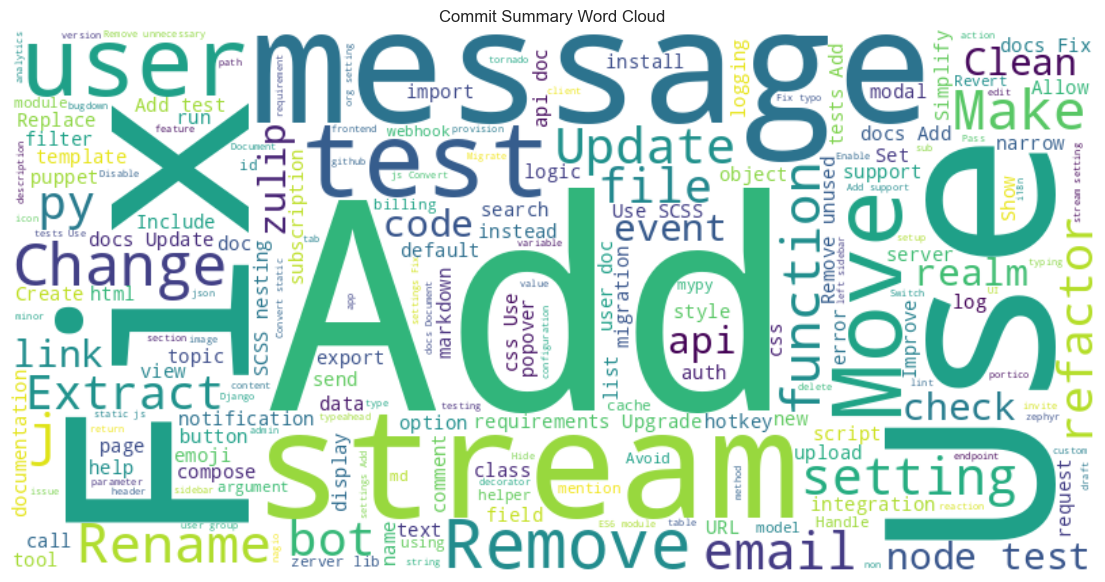

In [50]:
from wordcloud import WordCloud

# 合并所有提交摘要
commit_summary = df['commit_summary'].dropna().str.cat(sep=' ')

# 生成词云
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(commit_summary)

# 显示词云
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Commit Summary Word Cloud')
plt.show()